<a href="https://colab.research.google.com/github/yusufdimari/deep_learning/blob/main/LSTM_for_Covariance_in_Drugs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Preprocessing

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [2]:
covariates=pd.read_csv('/content/dataset1_covariates.csv')
covariates_columns=covariates.columns
concentration=pd.read_csv('/content/dataset1_concentration.csv')

In [3]:
covariates_columns

Index(['age', 'sex', 'race', 'weight', 'SNP', 'hemoglobine', 'albumine',
       'last_dose_time', 'mg_twice_daily_dose', 'blood_conc', 'CL', 'V', 'ke'],
      dtype='object')

In [4]:
print('Covariates', covariates.shape)
print('Concentration', concentration.head())

Covariates (10000, 13)
Concentration     ID   t0        t1        t2        t3        t4        t5        t6  \
0  0.0  0.0  0.073589  0.105398  0.109641  0.107781  0.104642  0.101303   
1  1.0  0.0  0.045413  0.066081  0.070046  0.070263  0.069646  0.068850   
2  2.0  0.0  0.033053  0.047717  0.050106  0.049757  0.048812  0.047752   
3  3.0  0.0  0.083828  0.116438  0.116796  0.110401  0.102950  0.095691   
4  4.0  0.0  0.088855  0.125740  0.128948  0.124828  0.119293  0.113662   

         t7        t8  ...       t39       t40       t41       t42       t43  \
0  0.098006  0.094802  ...  0.033782  0.032676  0.031606  0.030572  0.029571   
1  0.068021  0.067193  ...  0.045909  0.045348  0.044794  0.044247  0.043707   
2  0.046686  0.045636  ...  0.022526  0.022019  0.021523  0.021038  0.020564   
3  0.088874  0.082528  ...  0.008286  0.007694  0.007144  0.006633  0.006159   
4  0.108220  0.103021  ...  0.022359  0.021284  0.020260  0.019286  0.018358   

        t44       t45       t46

In [8]:
covariates['sex']=LabelEncoder().fit_transform(covariates['sex'])
covariates['race']=LabelEncoder().fit_transform(covariates['race'])

In [5]:
concentration.drop('ID', axis=1, inplace=True)

In [6]:
print('Covariates', covariates.head())
print('Concentration', concentration.head())

Covariates    age     sex                race      weight  SNP  hemoglobine  albumine  \
0   45  female            Hispanic   45.356214    1    12.241511  4.410228   
1   44    male    African-American  101.681722    1     9.081308  4.019755   
2   48    male    African-American   43.097253    3    15.207377  3.827743   
3   38  female  Caucasian-American  105.426845    3     7.505029  4.056076   
4   58  female  Caucasian-American   70.944214    2     7.767208  4.009812   

   last_dose_time  mg_twice_daily_dose  blood_conc          CL            V  \
0              52             1.558692    6.099252   83.505054  2508.682376   
1              52             5.596025    8.692098   50.351950  4097.639377   
2              52             4.211476   12.968132  127.717291  5607.584945   
3              52             4.685671    7.403773  160.794221  2168.550214   
4              52             4.616164    3.194455  101.774684  2065.161208   

         ke  
0  0.033286  
1  0.012288  
2  

In [9]:
scaler=MinMaxScaler()
normalized_covariates=scaler.fit_transform(covariates)
normalized_concentration=scaler.fit_transform(concentration)

In [10]:
print('Covariates', normalized_covariates[1])
print('Concentration', normalized_concentration[1])

Covariates [0.46153846 1.         0.         0.62241109 0.         0.34290378
 0.4591198  0.         0.67599331 0.55546685 0.05639366 0.09176679
 0.03376273]
Concentration [0.         0.09551245 0.10906969 0.12232017 0.12855275 0.13430241
 0.14036886 0.14673243 0.15339599 0.16037061 0.16767049 0.17531139
 0.18331016 0.19168466 0.20045377 0.20963747 0.22495356 0.23976071
 0.25416191 0.26839801 0.28265707 0.29708836 0.31181244 0.32692856
 0.34252022 0.35865929 0.37540914 0.39282704 0.41096596 0.42987604
 0.44960566 0.47020228 0.49171317 0.50368139 0.51116314 0.51874568
 0.52283805 0.52619912 0.5295778  0.5329752  0.53639219 0.53982943
 0.54328748 0.54676677 0.55026767 0.55379048 0.55733547 0.56090288
 0.56449291]


In [11]:
print(normalized_covariates.shape)
print(normalized_concentration.shape)
data=np.hstack((normalized_covariates, normalized_concentration))

(10000, 13)
(10000, 49)


In [12]:
data.shape
covariates = normalized_covariates  # Shape: (10000, 13)
concentration = normalized_concentration  # Shape: (10000, 49)
concentration_reshaped = concentration.reshape(10000, 49, 1)

# Step 2: The covariates remain static for each subject, so repeat them for each time point.
covariates_reshaped = np.repeat(covariates[:, np.newaxis, :], 49, axis=1)

# Step 3: Concatenate the covariates and concentration along the features axis
data_3d = np.concatenate([covariates_reshaped, concentration_reshaped], axis=-1)

print(f"Shape of the reshaped data: {data_3d.shape}")

Shape of the reshaped data: (10000, 49, 14)


In [13]:
print(len(covariates))

10000


In [14]:
n_subjects=len(covariates)
n_timepoints=concentration.shape[1]
n_features = covariates.shape[1] + 1
print(n_subjects, n_timepoints, n_features)

10000 49 14


In [15]:
# Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(data_3d[:, :-1, :], data_3d[:, 1:, -1], test_size=0.2, random_state=42)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(1))  # Output layer to predict the next drug concentration

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0253 - val_loss: 0.0108
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0112 - val_loss: 0.0107
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0110 - val_loss: 0.0107
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0111 - val_loss: 0.0108
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0111 - val_loss: 0.0107
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0111 - val_loss: 0.0107
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0110 - val_loss: 0.0106
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0110 - val_loss: 0.0107
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0111 - val_loss: 0.0106
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0109 - val_loss: 0.0106
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0110 - val_loss: 0.0106
Epoch 12/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/

In [ ]:
# Evaluate on the test set
loss = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Loss (MSE): {loss}")

Test Loss (MSE): 0.010827506892383099


In [ ]:
model.save('lstm_model.keras')
model.save_weights('lstm.weights.h5')

In [ ]:
y_pred=model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
print(y_pred.shape)
print(Y_test.shape)

(2000, 1)
(2000, 48)


In [28]:
# Modify output layer to output 48 values (multi-step prediction)
model2 = Sequential()
model2.add(LSTM(64, input_shape=(49, 13), return_sequences=False))
model2.add(Dense(48))  # Output layer now predicts 48 values
model2.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
# Compile the model
model2.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the model
history = model2.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0660 - val_loss: 0.0320
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0174 - val_loss: 0.0150
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0089 - val_loss: 0.0110
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0067 - val_loss: 0.0090
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0067 - val_loss: 0.0042
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 12/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

In [ ]:
# Evaluate on the test set
loss = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Loss (MSE): {loss}")

Test Loss (MSE): 0.010827506892383099


In [ ]:
y_pred=model2.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
print(y_pred.shape)
print(Y_test.shape)

(2000, 48)
(2000, 48)


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
r2 = r2_score(Y_test, y_pred)
print(f"R-squared: {r2}")
mae = mean_absolute_error(Y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


R-squared: 0.9499374026912378
Mean Absolute Error: 0.01773068156458804


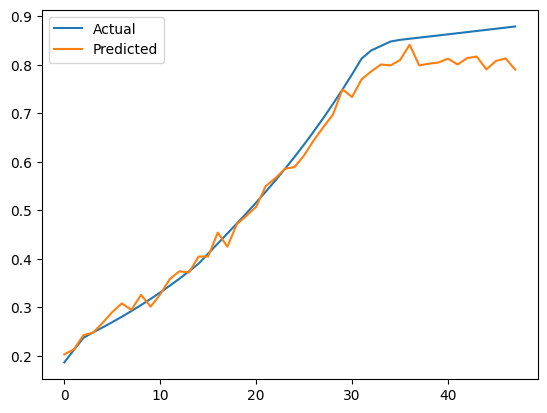

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Y_test[0], label="Actual")
plt.plot(y_pred[0], label="Predicted")
plt.legend()
plt.show()


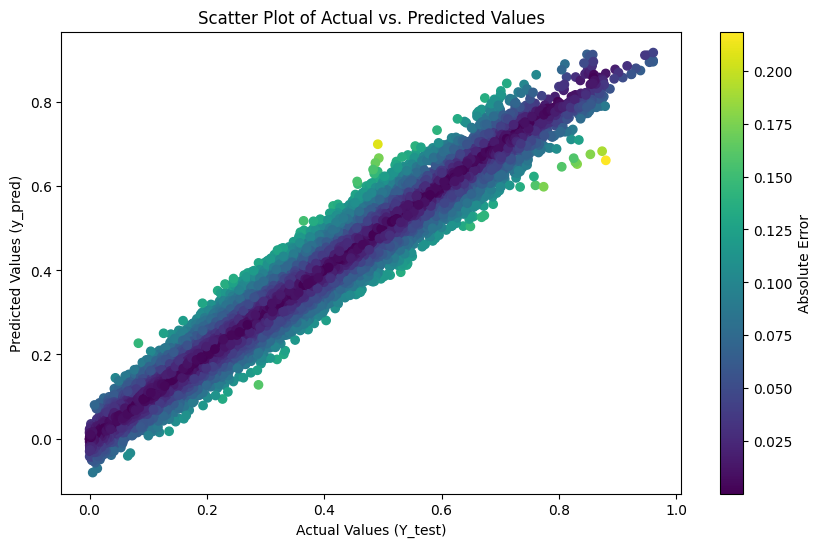

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, c=np.abs(Y_test - y_pred), cmap='viridis')  # Color points by absolute error
plt.colorbar(label='Absolute Error')
plt.xlabel("Actual Values (Y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.show()

In [26]:
# prompt: load a model that is saved locally

from tensorflow.keras.models import load_model

# Load the saved model
model2 = load_model('/content/lstm_model.keras')
y_pred=model2.predict(X_test)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [27]:
from sklearn.metrics import mean_squared_error

def compute_permutation_importance(model, X_test, Y_test, covariate_names):
    baseline_mse = mean_squared_error(Y_test, y_pred)
    feature_importance = {}

    for i, feature_name in enumerate(covariate_names):
        X_test_permuted = X_test.copy()
        np.random.shuffle(X_test_permuted[:, :, i])  # Shuffle the feature
        permuted_mse = mean_squared_error(Y_test, model.predict(X_test_permuted))
        feature_importance[feature_name] = baseline_mse - permuted_mse

    return feature_importance

feature_importance = compute_permutation_importance(model2, X_test, Y_test, covariates_columns)
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Print sorted feature importance
print("Feature Importance:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.4f}")


ValueError: y_true and y_pred have different number of output (48!=1)

##SHAP for feature Importance

In [21]:
# Modify output layer to output 48 values (multi-step prediction)
model3 = Sequential()
model3.add(LSTM(64, input_shape=(49, 14), return_sequences=False))
model3.add(Dense(1))  # Output layer now predicts 48 values
model3.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
history3 = model3.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0158 - val_loss: 0.0108
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0110 - val_loss: 0.0107
Epoch 3/50


KeyboardInterrupt: 